In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from datasets import Dataset

In [14]:
# load data
videos = Dataset.load_from_disk('../data/videos')
# load labels
labels = np.load('../data/cluster_labels.npy')

In [15]:
df = pd.DataFrame(videos)
df['label'] = labels

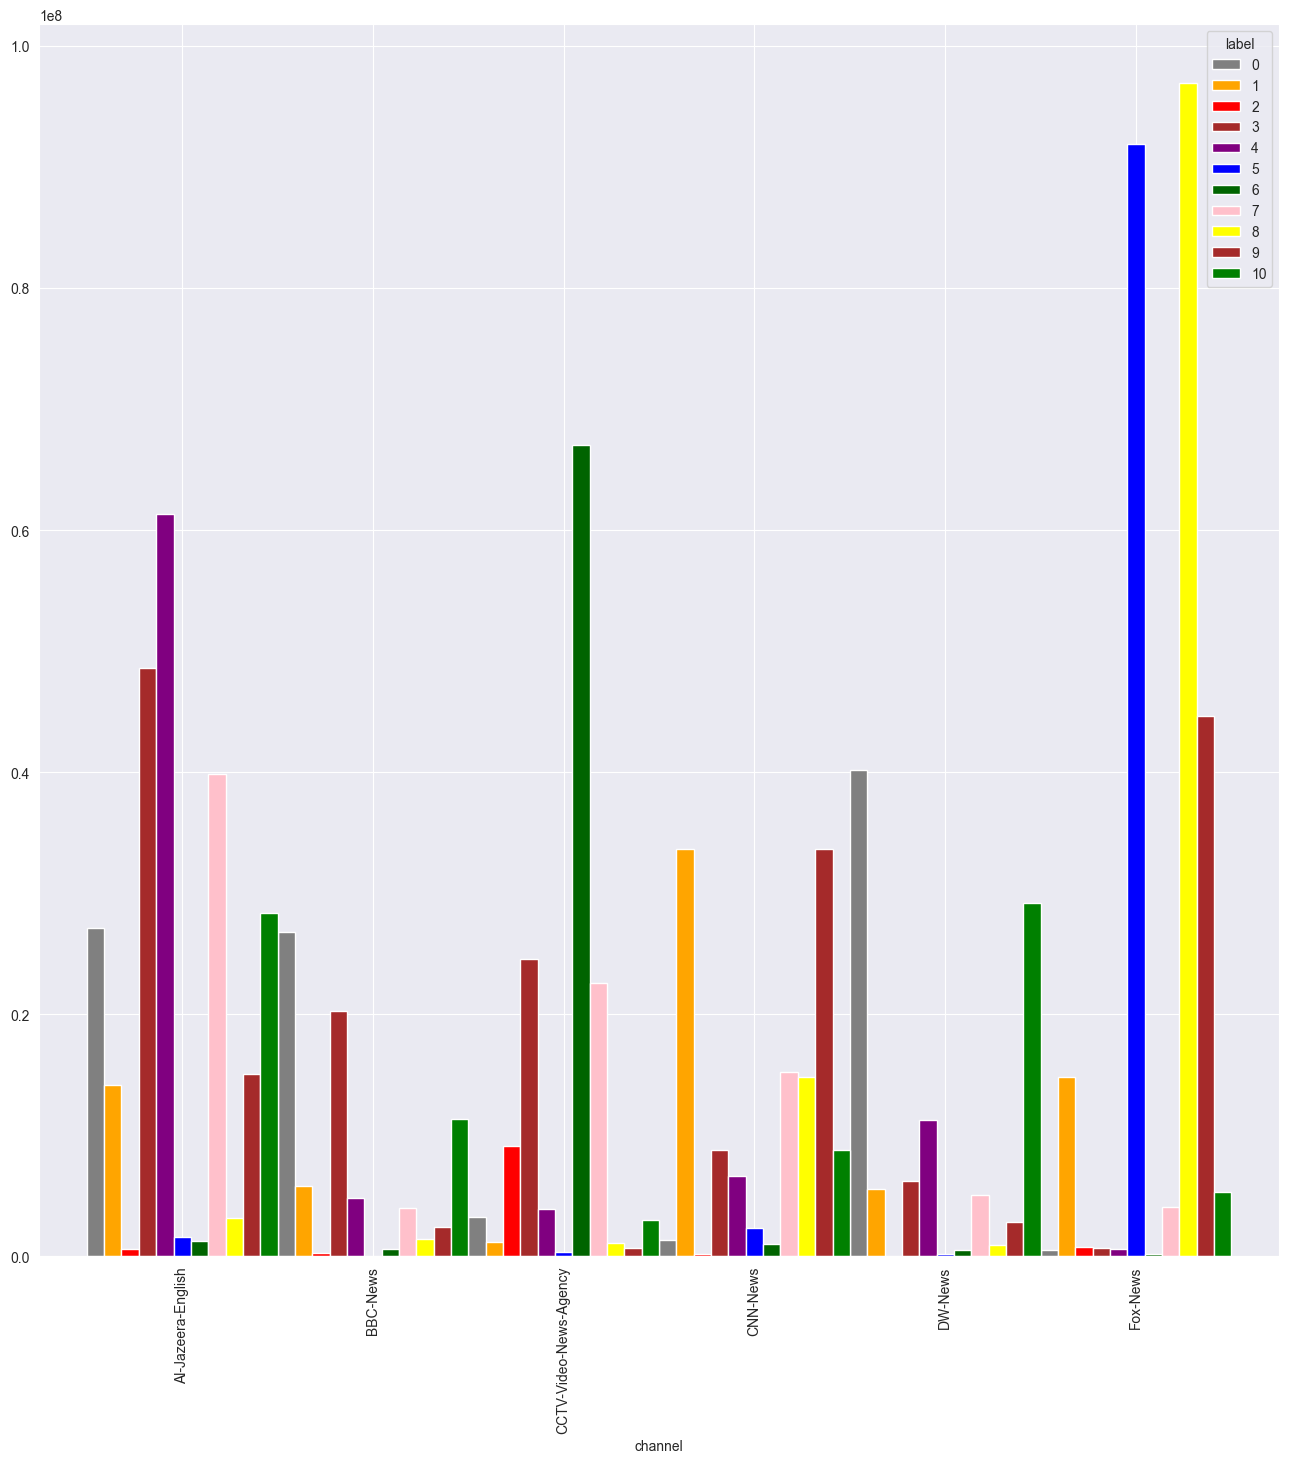

In [16]:
seaborn.set()
ag = df.groupby(['channel','label']).sum().unstack()
ag.columns = ag.columns.droplevel()

ag.plot(kind='bar',
        # colormap=cm.Accent,
        width=1,
        figsize=(16,16),
        color=['grey', 'orange', 'red', 'brown', 'purple', 'blue', 'darkgreen', 'pink', 'yellow', 'brown', 'green']
        )
plt.show()